<a href="https://colab.research.google.com/github/t6nand/mltasks/blob/master/logistics_regression_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

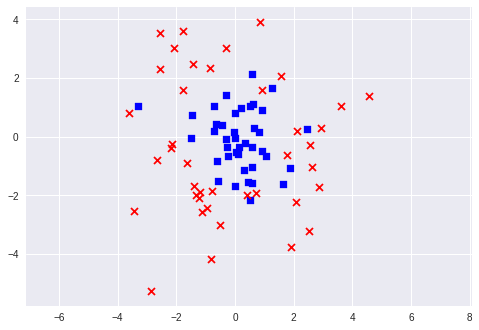

cost: 78.534
cost post descent: 24.143


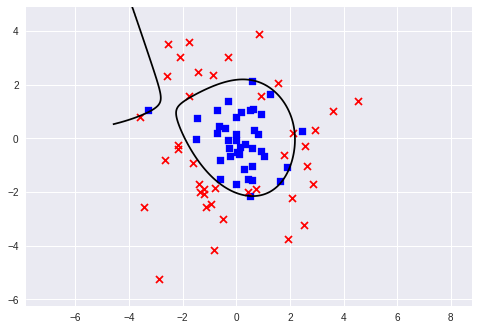

In [10]:
import numpy as np
import matplotlib.pyplot as plt

np.seterr(all='ignore')

set_selector = True
if not set_selector:
  from dataset1_logreg import DataSet
else:
  from dataset2_logreg import DataSet

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# Initialization of Model Parameter Vector
P = 7
w = np.array([0.1]*((P*(P+3))//2 +1)).reshape((-1,1))

# Weight Decay
weight_decay_lbd = 0.08

# use to compute normalizatiom parameters
def get_norm_params(x_data):
  mean_x      = np.mean(x_data[:], axis=1).reshape((-1,1))
  stdd_x      = np.std(x_data[:], axis=1).reshape((-1,1))
  return mean_x, stdd_x

# Function to calclate cross entropy cost function
def ce_cost(x_arr, y_arr, predict_f):   
  y_eq_0 = (y_arr==0).nonzero()[1]
  y_eq_1 = (y_arr==1).nonzero()[1]
  a = predict_f(x_D)
  cost = np.sum( -np.log2(a[0][y_eq_1])) + np.sum( -np.log2(1-a[0][y_eq_0]))
  return cost

# import data, plot data
y_D, x_D = DataSet.get_data()
DataSet.plot_data()
plt.show()

# normalization parameters
mean_x, stdd_x = get_norm_params(x_D)   

# Extends the 2D data to include Non linear functions of input
def extend_data2D(x, p): 
    x_tmp = [[x[0,:]**(k-i)*x[1,:]**i for i in range(k+1)] for k in range(1,p+1)]
    x_e = np.vstack(x_tmp)
    return x_e

# Compute Normalization parameters
x_De = extend_data2D(x_D, P)
x_De_mean, x_De_stdd = get_norm_params(x_De)


# Predict output function. Output represents the probability that it belongs to 
# class y E {0, 1}
def predict_y2(x_arr):
  x = extend_data2D(x_arr, P)
  x = (x-x_De_mean)/x_De_stdd
  x = np.vstack((np.ones((1,x.shape[1])), x))
  z = w.T.dot(x)
  a = sigmoid(z)
  return a

# Plot model & compute cross entropy cost
print('cost: %.3f' % ce_cost(x_D, y_D, predict_y2))

# Compute Gradient for initial conditions
a = predict_y2(x_D)
x_train = extend_data2D(x_D, P)
x_train = (x_train-x_De_mean)/x_De_stdd
x_train = np.vstack((np.ones((1,x_D.shape[1])), x_train))
grad_reg = (2*weight_decay_lbd*w)
grad_reg[0][0] = 0
grad_w_initial = x_train.dot((a-y_D).T) + grad_reg

# Gradient Descent
update_iterations = 30000
learning_rate = 0.1
for i in range(update_iterations):
  a = predict_y2(x_D)
  grad_reg = (2*weight_decay_lbd*w)
  grad_reg[0][0] = 0
  grad_w = x_train.dot((a-y_D).T) + grad_reg
  if np.prod(grad_w) == 0:
    break
  else:
    w = w - (learning_rate * grad_w)

# Plot Decision boundary
DataSet.plot_decision_boundary(predict_y2)
print('cost post descent: %.3f' % ce_cost(x_D, y_D, predict_y2))
